## Charge the libraries

In [1]:
# Automatically reload modules
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
# Import standard Libraries
import os
import sys

# Import third-party Libraries
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import numpy as np # Required for the alternative loading method
import matplotlib.pyplot as plt
import seaborn as sns

## Funtions to use in the code

In [ ]:
def visualize_distribution(dataframe, columns):
    """
    Creates distribution visualizations for the specified columns.
    For each column, generates a 1x2 plot with histogram and boxplot.
    
    Parameters:
    - dataframe: Pandas DataFrame containing the data
    - columns: List of column names to visualize
    """
    # Configure seaborn style
    sns.set(style="whitegrid")
    
    # Iterate over each column and create its visualizations
    for column in columns:
        # Create figure with two subplots (1 rows, 2 column)
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        # Main title for the complete figure
        fig.suptitle(f'Distribution Analysis: {column}', fontsize=16)
        
        # Subplot 1: Histogram with density estimator
        sns.histplot(dataframe[column], bins=30, kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram of {column}')
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Frequency')
        
        # Subplot 2: Boxplot
        sns.boxplot(x=dataframe[column], ax=axes[1])
        axes[1].set_title(f'Boxplot of {column}')
        axes[1].set_xlabel(column)

        # Adjust layout and display
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)  # Leave space for the main title
        plt.show()

In [ ]:
def plot_correlation_with_target(dataframe, features_list, target_name, figsize=(12, 8)):
    """
    Creates a correlation heatmap showing relationships between selected features and a target variable.
    
    Parameters:
    - dataframe: Pandas DataFrame containing the data
    - features_list: List of feature column names to include in the correlation analysis
    - target_name: Name of the target variable column
    - figsize: Tuple specifying the figure size (width, height)
    """
    # Ensure target is included in the features to correlate
    columns_to_correlate = features_list.copy()
    if target_name not in columns_to_correlate:
        columns_to_correlate.append(target_name)
    
    # Select only the specified columns from the dataframe
    selected_df = dataframe[columns_to_correlate]
    
    # Calculate the correlation matrix
    correlation_matrix = selected_df.corr()
    
    # Create the figure
    plt.figure(figsize=figsize)
    
    # Generate the heatmap
    sns.heatmap(
        correlation_matrix, 
        annot=True,               # Show correlation values inside cells
        fmt=".2f",                # Format to 2 decimal places
        cmap='coolwarm',          # Color map (red = negative, blue = positive)
        square=True,              # Make cells square-shaped
        cbar_kws={"shrink": .8},  # Customize the color bar
        vmin=-1, vmax=1           # Set the min/max of the color scale to -1/1
    )
    
    # Add title and adjust layout
    plt.title(f'Correlation Matrix with Target: {target_name}', fontsize=14)
    plt.tight_layout()
    plt.show()

In [5]:
def remove_outliers(dataframe, column):
    """
    Removes outliers from the specified column in the DataFrame using IQR method.
    
    Parameters:
    - dataframe: Pandas DataFrame containing the data
    - column: Name of the column to check for outliers
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to remove outliers
    filtered_df = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    
    return filtered_df

## Charge the dataset

In [6]:
# Attempt to load the Boston dataset
boston_data_available = False
boston_df = None

# Try loading from the original source URL as load_boston is removed from sklearn
try:
    print("Loading the Boston dataset")

    # URL for the Boston housing dataset
    data_url = "http://lib.stat.cmu.edu/datasets/boston"

    # Read the data using specific parsing logic for this file format
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

    # Data is interlaced, needs reshaping
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

    # Define feature names based on dataset description
    feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                        'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

    # Create Pandas DataFrame
    boston_df = pd.DataFrame(data, columns=feature_names)
    boston_df['MEDV'] = target # Target variable: Median value of owner-occupied homes in $1000s

    # Define feature names based on predictor variables
    feature_names = ['AGE', 'LSTAT']
    target_name = 'MEDV'

    # Mantain in boston_df the features and target
    boston_df = boston_df[feature_names + [target_name]]

    # Set the flag to indicate successful loading
    boston_data_available = True
    print("Successfully loaded Boston dataset.")

except Exception as e:
    print(f"Error loading Boston dataset: {e}")
    print("Cannot proceed without the dataset. Please check the URL or your internet connection.")
    print("Note: The Boston dataset has ethical concerns and is deprecated in scikit-learn.")

Loading the Boston dataset
Successfully loaded Boston dataset.


## Explore the data structure

In [7]:
# Analyze the data only if was loaded successfully
try:
    if boston_data_available and boston_df is not None:

        # Explore Data Structure
        print("Data Exploration")
        print("===================================")
        print("First 5 rows of the dataset:")
        print(boston_df.head(), "\n")

        # Provide information of the DataFrame
        print("Dataset information (columns, data types, non-null counts):")
        print("===================================")
        boston_df.info()
        print("\n")

        # Describe the statistical details (mean, std dev, min, max, quartiles) of the dataset
        print("Statistics for numerical columns:")
        print("===================================")
        print(boston_df.describe(), "\n")

        # Check for missing values and counts missing values per column
        print("Check for any missing values:")
        print("===================================")
        print(boston_df.isnull().sum()) # Counts missing values per column, this check strategy is a good practice.
        print("\n")

    else:
        print("Analysis could not be performed as the Boston dataset failed to load.")

except Exception as e:
    print(f"Error during analysis: {e}")
    print("Please check the dataset and try again.")

Data Exploration
First 5 rows of the dataset:
    AGE  LSTAT  MEDV
0  65.2   4.98  24.0
1  78.9   9.14  21.6
2  61.1   4.03  34.7
3  45.8   2.94  33.4
4  54.2   5.33  36.2 

Dataset information (columns, data types, non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     506 non-null    float64
 1   LSTAT   506 non-null    float64
 2   MEDV    506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


Statistics for numerical columns:
              AGE       LSTAT        MEDV
count  506.000000  506.000000  506.000000
mean    68.574901   12.653063   22.532806
std     28.148861    7.141062    9.197104
min      2.900000    1.730000    5.000000
25%     45.025000    6.950000   17.025000
50%     77.500000   11.360000   21.200000
75%     94.075000   16.955000   25.000000
max    100.000000   37.970000   50.000000 

Check for any missin

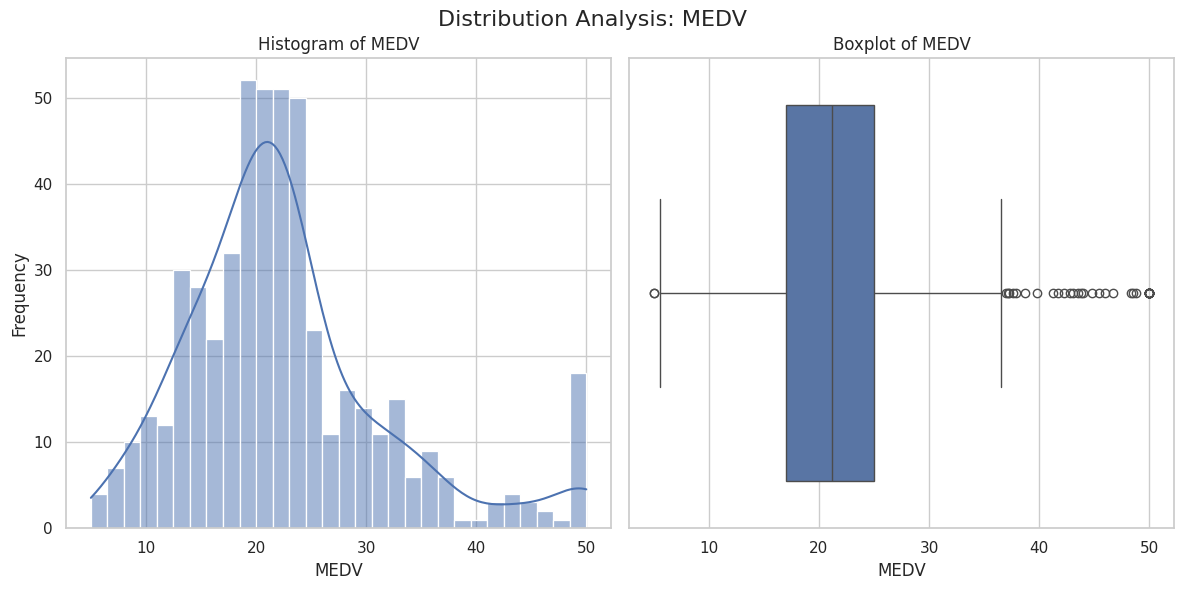

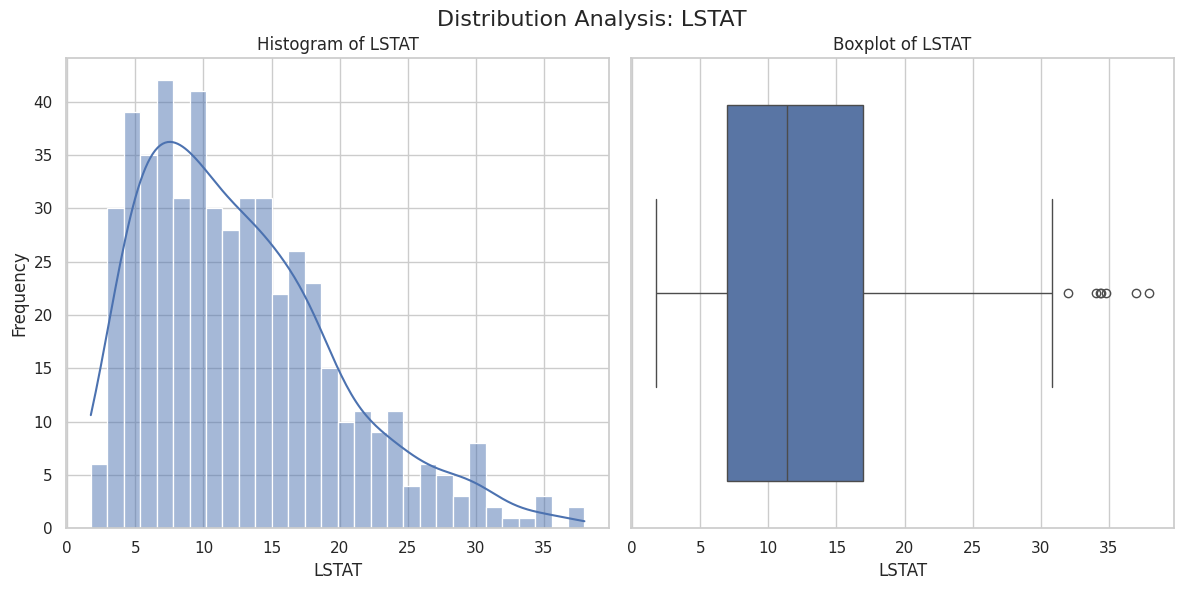

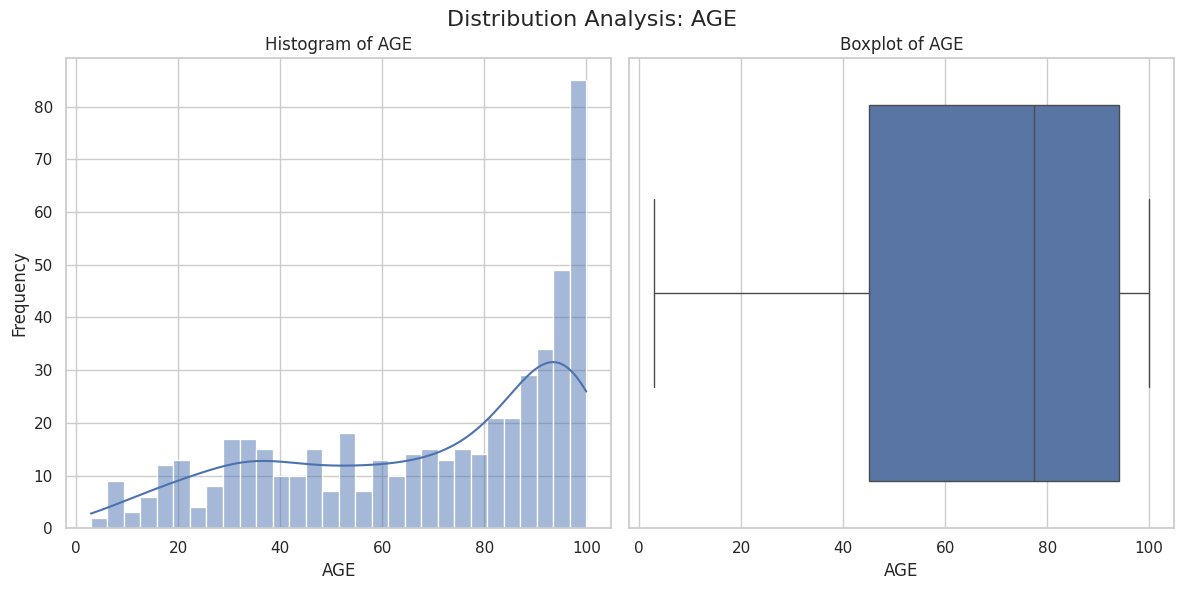

In [8]:
# Visualize the main variables used in the analysis
columns_to_visualize = ['MEDV', 'LSTAT', 'AGE']
visualize_distribution(boston_df, columns_to_visualize)

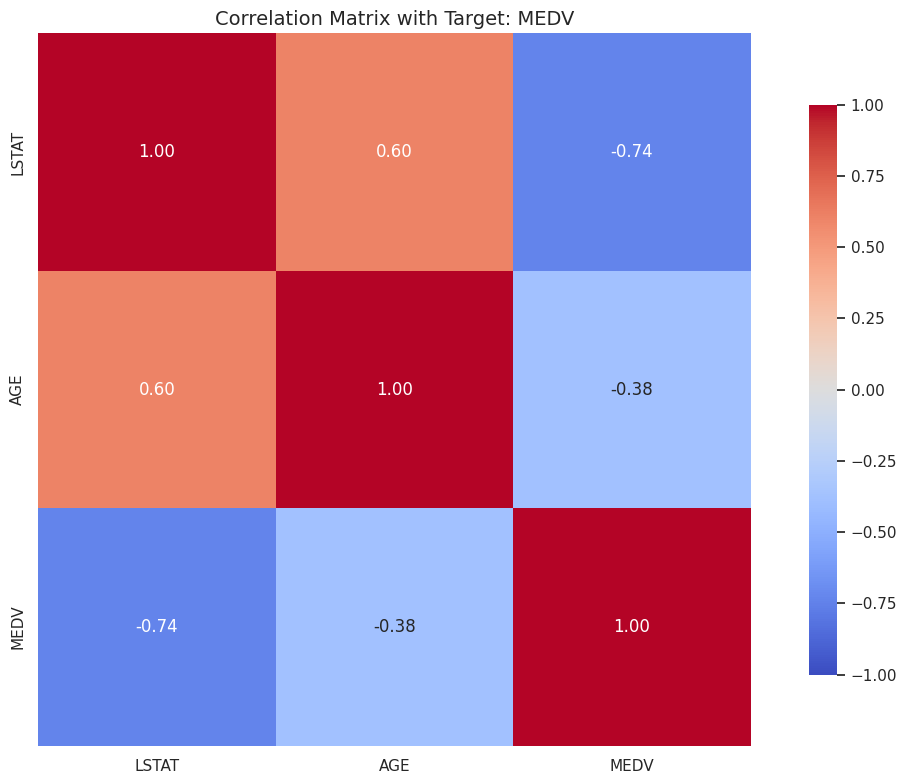

In [9]:
# Plot correlation heatmap for selected features with the target variable
features_of_interest = ['LSTAT', 'AGE']
target_name = 'MEDV'
plot_correlation_with_target(boston_df, features_of_interest, target_name)

## Preprocessing the dataset

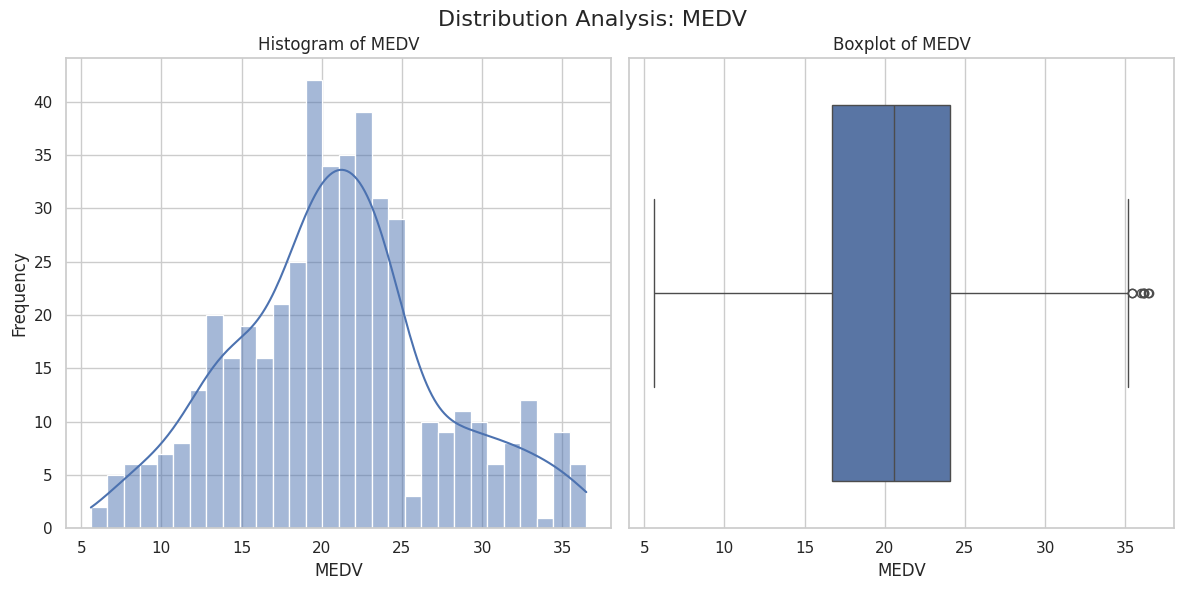

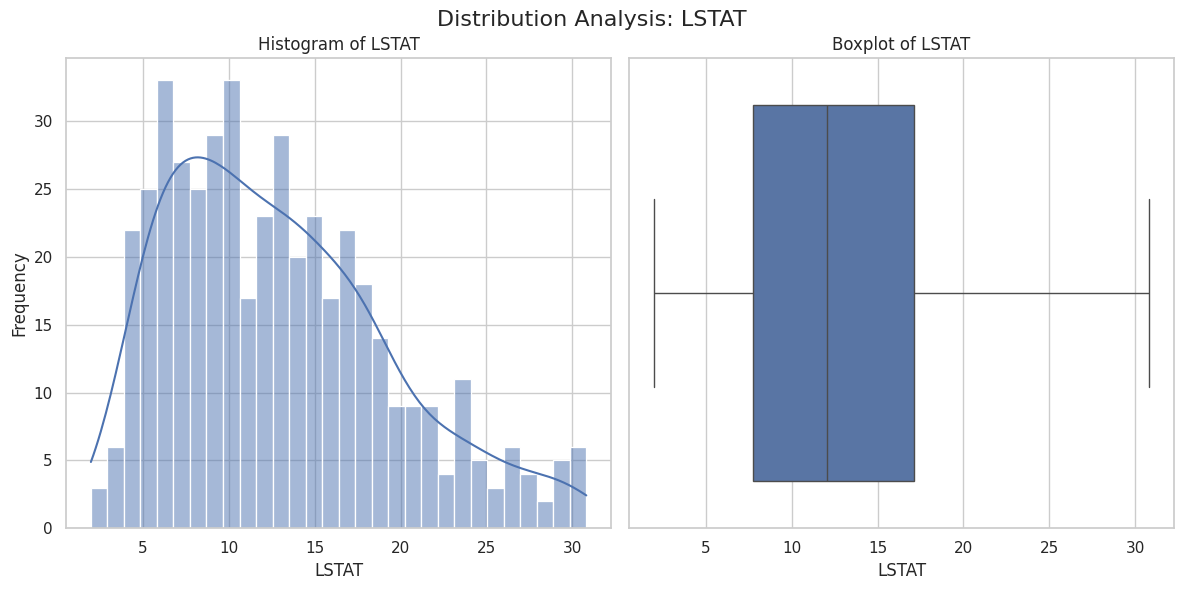

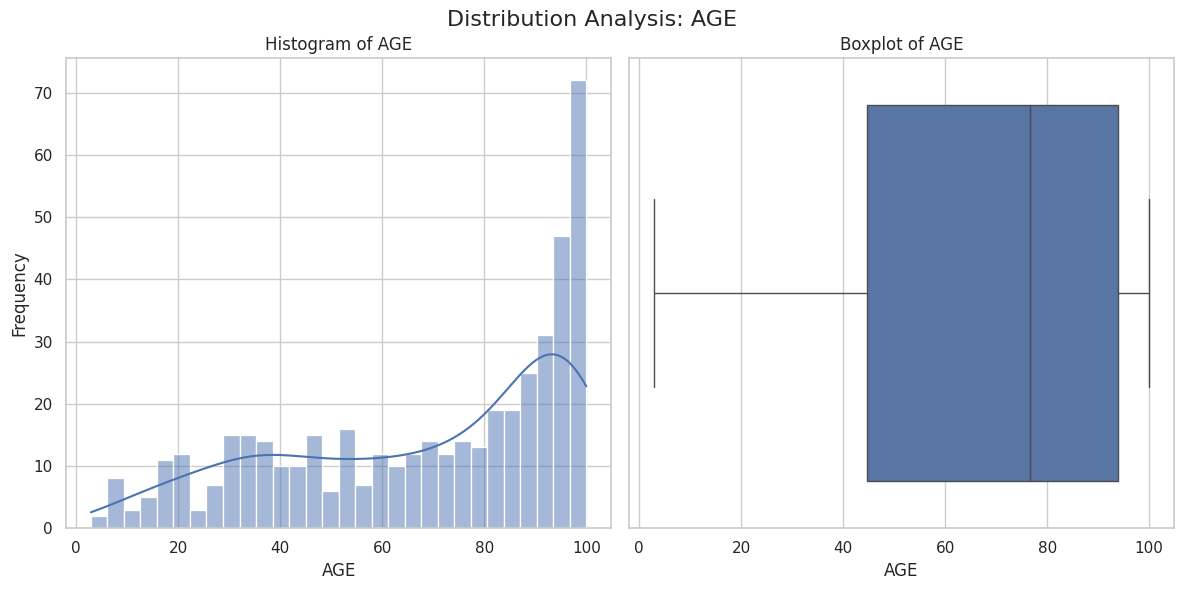

In [10]:
# Remove outliers from 'LSTAT', 'AGE', and 'MEDV' columns
boston_df_cleaned = boston_df.copy()
boston_df_cleaned = remove_outliers(boston_df_cleaned, 'LSTAT')
boston_df_cleaned = remove_outliers(boston_df_cleaned, 'AGE')
boston_df_cleaned = remove_outliers(boston_df_cleaned, 'MEDV')

# Visualize the cleaned data distribution
columns_to_visualize = ['MEDV', 'LSTAT', 'AGE']
visualize_distribution(boston_df_cleaned, columns_to_visualize)

In [11]:
# Define the features and target variable
feature_names = ['LSTAT', 'AGE']
target_name = 'MEDV'

# Divide the dataset into features (X) and target (y)
X = boston_df_cleaned[feature_names]
y = boston_df_cleaned[target_name]

# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
boston_df_scaled = pd.DataFrame(X_scaled, columns=feature_names)

# Add the target variable to the scaled DataFrame
boston_df_scaled[target_name] = y.values

# Display the first few rows of the scaled DataFrame
boston_df_scaled.head()

,LSTAT,AGE,MEDV
0,-1.237988,-0.108479,24.0
1,-0.591442,0.380726,21.6
2,-1.385637,-0.254883,34.7
3,-1.555044,-0.801221,33.4
4,-1.183591,-0.501271,36.2


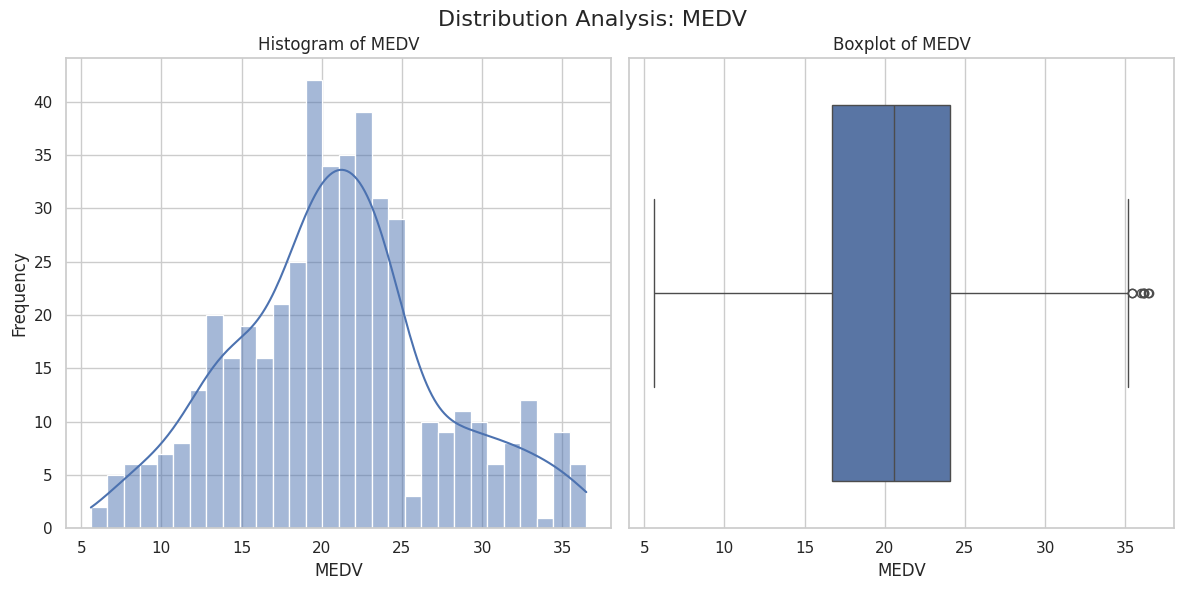

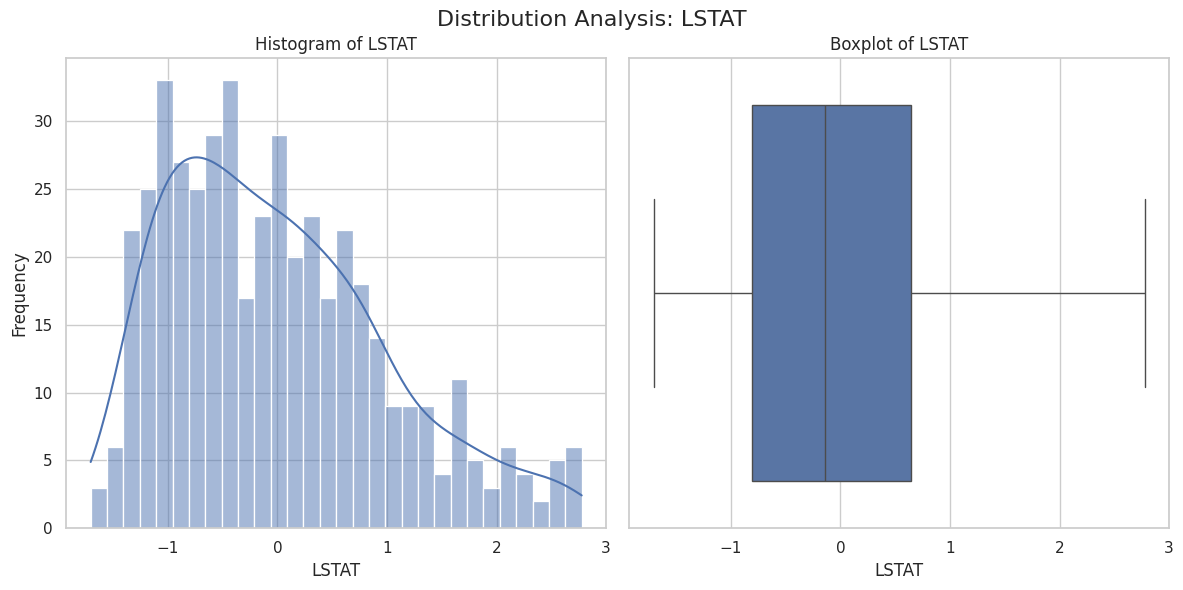

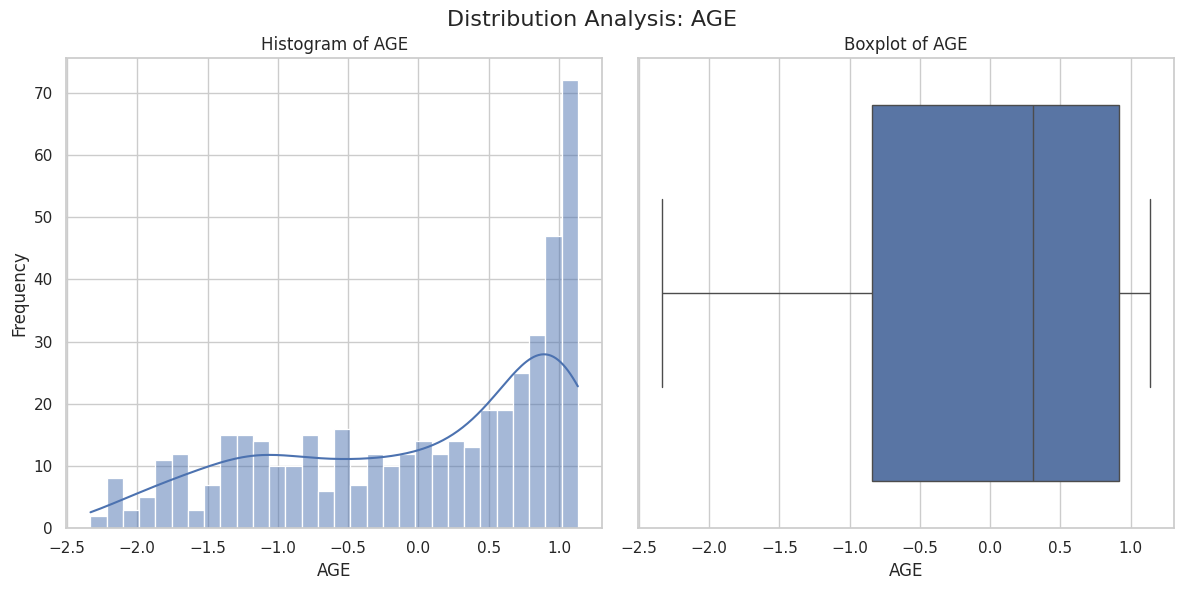

In [12]:
# Visualize the cleaned data distribution
columns_to_visualize = ['MEDV', 'LSTAT', 'AGE']
visualize_distribution(boston_df_scaled, columns_to_visualize)

## Fit a multiple linear regression model

### Original Dataset

In [13]:
# Fit a Multiple Linear Regression Model
print("Fitting model: MEDV ~ LSTAT + AGE")
print("===================================")

# Define the model using the R-style formula syntax from statsmodels
# 'MEDV' is the dependent variable, 'LSTAT' and 'AGE' are the independent variables
# The '+' sign indicates they are both included in the model
formula = 'MEDV ~ LSTAT + AGE'

# Fit the Ordinary Least Squares (OLS) model, smf.ols takes the formula and the DataFrame as input
model = smf.ols(formula=formula, data=boston_df).fit()
print("Model fitted successfully.")

Fitting model: MEDV ~ LSTAT + AGE
Model fitted successfully.


In [14]:
# Show the coefficients as a Series object
print("Coeficientes:")
print("===================================")
print(f"\n{model.params}")

Coeficientes:

Intercept    33.222761
LSTAT        -1.032069
AGE           0.034544
dtype: float64


In [15]:
# Display Model Results
print("Model Summary")
print("===================================")
# Summary of detailed statistical overview of the fitted model
print(f"{model.summary()}")

Model Summary
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           2.98e-88
Time:                        19:48:54   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     4

In [16]:
# Extract and print key results for clarity
print("R-squared and Adjusted R-squared:")
print("===================================")
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adj. R-squared: {model.rsquared_adj:.4f}")
print("\n")

print("F-statistic and p-value:")
print("===================================")
print(f"F-statistic: {model.fvalue:.4f}")
print(f"p-value: {model.f_pvalue:.4f}")

R-squared and Adjusted R-squared:
R-squared: 0.5513
Adj. R-squared: 0.5495


F-statistic and p-value:
F-statistic: 308.9693
p-value: 0.0000


In [17]:
# Compute the 95% confidence intervals for the model coefficients 
# (Calculate and display 95% confidence intervals for model coefficients)
conf_int = model.conf_int(alpha=0.05)  # 95% confidence intervals

# Format the confidence intervals with the coefficients
conf_int_df = pd.DataFrame({
    'Coefficient': model.params,
    'Lower Bound (2.5%)': conf_int[0],
    'Upper Bound (97.5%)': conf_int[1]
})

print("95% Confidence Intervals for Model Coefficients:")
print("===================================================")
print(conf_int_df)

95% Confidence Intervals for Model Coefficients:
           Coefficient  Lower Bound (2.5%)  Upper Bound (97.5%)
Intercept    33.222761           31.786872            34.658650
LSTAT        -1.032069           -1.126748            -0.937389
AGE           0.034544            0.010525             0.058564


### Cleaned Dataset

In [18]:
# Fit a Multiple Linear Regression Model
print("Fitting model: MEDV ~ LSTAT + AGE")
print("===================================")

# Define the model using the R-style formula syntax from statsmodels
# 'MEDV' is the dependent variable, 'LSTAT' and 'AGE' are the independent variables
# The '+' sign indicates they are both included in the model
formula = 'MEDV ~ LSTAT + AGE'

# Fit the Ordinary Least Squares (OLS) model, smf.ols takes the formula and the DataFrame as input
model_cleaned = smf.ols(formula=formula, data=boston_df_cleaned).fit()
print("Model fitted successfully.")

Fitting model: MEDV ~ LSTAT + AGE
Model fitted successfully.


In [19]:
# Show the coefficients as a Series object
print("Coeficientes:")
print("===================================")
print(f"\n{model_cleaned.params}")

Coeficientes:

Intercept    31.338252
LSTAT        -0.730677
AGE          -0.015012
dtype: float64


In [20]:
# Display Model Results
print("Model Summary")
print("===================================")
# Summary of detailed statistical overview of the fitted model
print(f"{model.summary()}")

Model Summary
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           2.98e-88
Time:                        19:48:54   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     4

In [21]:
# Extract and print key results for clarity
print("R-squared and Adjusted R-squared:")
print("===================================")
print(f"R-squared: {model_cleaned.rsquared:.4f}")
print(f"Adj. R-squared: {model_cleaned.rsquared_adj:.4f}")
print("\n")

print("F-statistic and p-value:")
print("===================================")
print(f"F-statistic: {model_cleaned.fvalue:.4f}")
print(f"p-value: {model_cleaned.f_pvalue:.4f}")

R-squared and Adjusted R-squared:
R-squared: 0.6112
Adj. R-squared: 0.6095


F-statistic and p-value:
F-statistic: 358.4708
p-value: 0.0000


In [22]:
# Compute the 95% confidence intervals for the model coefficients 
# (Calculate and display 95% confidence intervals for model coefficients)
conf_int = model_cleaned.conf_int(alpha=0.05)  # 95% confidence intervals

# Format the confidence intervals with the coefficients
conf_int_df = pd.DataFrame({
    'Coefficient': model_cleaned.params,
    'Lower Bound (2.5%)': conf_int[0],
    'Upper Bound (97.5%)': conf_int[1]
})

print("95% Confidence Intervals for Model Coefficients:")
print("===================================================")
print(conf_int_df)

95% Confidence Intervals for Model Coefficients:
           Coefficient  Lower Bound (2.5%)  Upper Bound (97.5%)
Intercept    31.338252           30.353788            32.322716
LSTAT        -0.730677           -0.806258            -0.655096
AGE          -0.015012           -0.032377             0.002353


### Cleaned and Scaled Dataset

In [23]:
# Fit a Multiple Linear Regression Model
print("Fitting model: MEDV ~ LSTAT + AGE")
print("===================================")

# Define the model using the R-style formula syntax from statsmodels
# 'MEDV' is the dependent variable, 'LSTAT' and 'AGE' are the independent variables
# The '+' sign indicates they are both included in the model
formula = 'MEDV ~ LSTAT + AGE'

# Fit the Ordinary Least Squares (OLS) model, smf.ols takes the formula and the DataFrame as input
model_scaled = smf.ols(formula=formula, data=boston_df_scaled).fit()
print("Model fitted successfully.")

Fitting model: MEDV ~ LSTAT + AGE
Model fitted successfully.


In [24]:
# Show the coefficients as a Series object
print("Coeficientes:")
print("===================================")
print(f"\n{model_scaled.params}")

Coeficientes:

Intercept    20.854902
LSTAT        -4.701313
AGE          -0.420416
dtype: float64


In [25]:
# Display Model Results
print("Model Summary")
print("===================================")
# Summary of detailed statistical overview of the fitted model
print(f"{model_scaled.summary()}")

Model Summary
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     358.5
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           2.81e-94
Time:                        19:48:54   Log-Likelihood:                -1285.1
No. Observations:                 459   AIC:                             2576.
Df Residuals:                     456   BIC:                             2589.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.8549      0.186    11

In [26]:
# Extract and print key results for clarity
print("R-squared and Adjusted R-squared:")
print("===================================")
print(f"R-squared: {model_scaled.rsquared:.4f}")
print(f"Adj. R-squared: {model_scaled.rsquared_adj:.4f}")
print("\n")

print("F-statistic and p-value:")
print("===================================")
print(f"F-statistic: {model_scaled.fvalue:.4f}")
print(f"p-value: {model_scaled.f_pvalue:.4f}")

R-squared and Adjusted R-squared:
R-squared: 0.6112
Adj. R-squared: 0.6095


F-statistic and p-value:
F-statistic: 358.4708
p-value: 0.0000


In [27]:
# Compute the 95% confidence intervals for the model coefficients 
# (Calculate and display 95% confidence intervals for model coefficients)
conf_int = model_scaled.conf_int(alpha=0.05)  # 95% confidence intervals

# Format the confidence intervals with the coefficients
conf_int_df = pd.DataFrame({
    'Coefficient': model_scaled.params,
    'Lower Bound (2.5%)': conf_int[0],
    'Upper Bound (97.5%)': conf_int[1]
})

print("95% Confidence Intervals for Model Coefficients:")
print("===================================================")
print(conf_int_df)

95% Confidence Intervals for Model Coefficients:
           Coefficient  Lower Bound (2.5%)  Upper Bound (97.5%)
Intercept    20.854902           20.488806            21.220998
LSTAT        -4.701313           -5.187613            -4.215012
AGE          -0.420416           -0.906716             0.065885
